<a href="https://colab.research.google.com/github/GO0108/Projeto-FMF/blob/GO0108-explore-2/PROJETO_BASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive com datasets: https://drive.google.com/drive/folders/1mnipUTsVHkwxGxmUqxDTdXuhbiwpiDq1?usp=sharing


Inspirado em: https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Separando datasets a serem usados





In [ ]:
# olha o pandas ai gente, importando bibliotecas
import pandas as pd

"""
df = pd.read_csv('/content/drive/MyDrive/PAD/Datasets/IMBD dataset.csv')
df.head()"""

"\ndf = pd.read_csv('/content/drive/MyDrive/PAD/Datasets/IMBD dataset.csv')\ndf.head()"

In [ ]:
# df.columns

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/PAD/Datasets/IMDB - Sentimentos Dataset.csv')
df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df_review.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive, df_negative])

# Manipulando os dados

In [ ]:
# Como existem mais positivos que negativos;
from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],
                                                           df_review_imb['sentiment'])

In [ ]:
length_negative = len(df_review[df_review['sentiment']=='negative'])
df_review_positive = df_review[df_review['sentiment']=='positive'].sample(n=length_negative)
df_review_non_positive = df_review[~(df_review['sentiment']=='positive')]

df_review_bal = pd.concat([
    df_review_positive, df_review_non_positive
])
df_review_bal.reset_index(drop=True, inplace=True)
df_review_bal['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#Treinando Modelos

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

In [ ]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [ ]:
review = ['I love writing code in Python. I love Python code',
          'I hate writing code in Java. I hate Java code']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<33500x86185 sparse matrix of type '<class 'numpy.float64'>'
	with 2982680 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00000000000,00001,000s,001,003830,0069,007,0079,...,übermenschlich,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,þorleifsson,þór,יגאל,כרמון
23990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_x_vector = tfidf.transform(test_x)

In [ ]:
#svc
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.89      0.90      0.90      8281
    negative       0.90      0.89      0.89      8219

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



[Text(0.5, 1.0, 'Matriz de Confusão')]

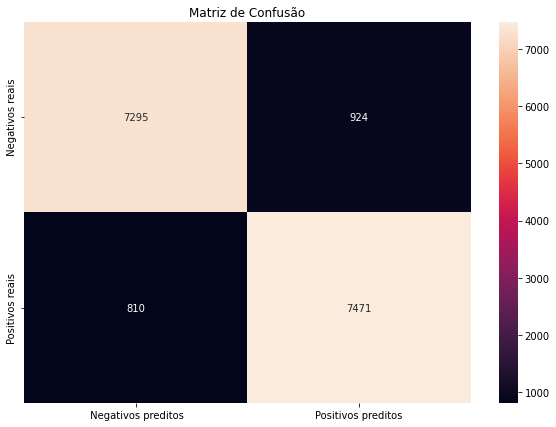

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(test_y,svc.predict(test_x_vector))



linhas = [' Negativos reais', 'Positivos reais']
colunas = [' Negativos preditos', 'Positivos preditos']

df_cm = pd.DataFrame(conf_mat, index =linhas, columns = colunas)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g').set(title="Matriz de Confusão", )

In [ ]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


In [ ]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [ ]:
print(classification_report(test_y, 
                            dec_tree.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.73      0.72      0.72      8281
    negative       0.72      0.73      0.72      8219

    accuracy                           0.72     16500
   macro avg       0.72      0.72      0.72     16500
weighted avg       0.72      0.72      0.72     16500



[Text(0.5, 1.0, 'Matriz de Confusão')]

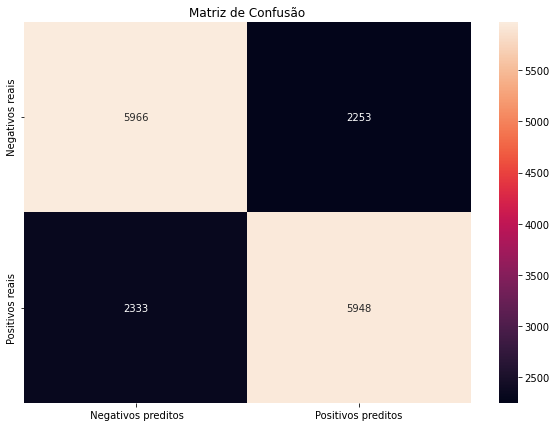

In [ ]:
conf_mat = confusion_matrix(test_y,dec_tree.predict(test_x_vector))


df_cm = pd.DataFrame(conf_mat, index =linhas, columns = colunas)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g').set(title="Matriz de Confusão", )

In [22]:
# Regressao Logistica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [23]:
print(classification_report(test_y, 
                            log_reg.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.89      0.90      0.90      8281
    negative       0.90      0.88      0.89      8219

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



[Text(0.5, 1.0, 'Matriz de Confusão')]

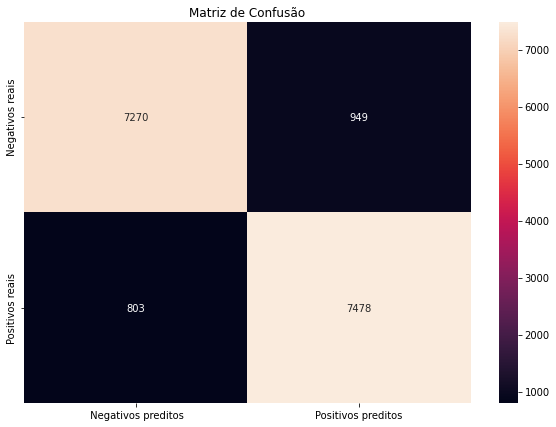

In [24]:
conf_mat = confusion_matrix(test_y,log_reg.predict(test_x_vector))



df_cm = pd.DataFrame(conf_mat, index =linhas, columns = colunas)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g').set(title="Matriz de Confusão", )

Nota: Não será testado **GaussianNB** por dificuldades técnicas. Não foi possível utilizar o método devido ao consumo excessivo de RAM.